# Import lib

In [31]:
from pyMSOO.MFEA.model import MFEA_base, SM_MFEA, LSA21
from pyMSOO.MFEA.competitionModel import SM_MFEA_Competition
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.Search import * 
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 

from pyMSOO.utils.EA import * 
from pyMSOO.MFEA.benchmark.continous.CEC17 import CEC17_benchmark 
from pyMSOO.MFEA.benchmark.continous.WCCI22 import WCCI22_benchmark
from pyMSOO.MFEA.benchmark.continous.funcs import * 

from pyMSOO.utils.MultiRun.RunMultiTime import * 
from pyMSOO.utils.MultiRun.RunMultiBenchmark import * 

from pyMSOO.utils.LoadSaveModel.load_utils import loadModel, loadModelFromTxt
from pyMSOO.utils.LoadSaveModel.save_utils import export_history2txt

from pyMSOO.utils.numba_utils import *
from pyMSOO.utils.Compare.compareModel import CompareModel

import pandas as pd 
import numpy as np 
import os 




# Run

## Define Tasks

In [1]:
class T : 
    def __init__(self, a) -> None:
        self.a = a

ls = [T(1),T(5),T(4),T(3), T(2)]

min_ = min([i.a for i in ls ])

In [4]:
square = {1:2, 3:4, 5:6}

keys = min(square, key= lambda k: square[k])
print(keys)

1


In [7]:
square[2]

KeyError: 2

In [2]:
t, ic = CEC17_benchmark.get_10tasks_benchmark()

ls_benchmark = [t]
ls_IndClass = [ic]
name_benchmark = ["cec17"]

# ls_benchmark = []
# ls_IndClass = []
# ls_tasks = [1]
# name_benchmark = [] 

# for i in ls_tasks:
#     # t, ic = WCCI22_benchmark.get_complex_benchmark(i)
#     t, ic = WCCI22_benchmark.get_50tasks_benchmark(i)
#     ls_benchmark.append(t)
#     ls_IndClass.append(ic)
#     name_benchmark.append(str(i))

ls_benchmark = []
ls_IndClass = []
ls_tasks = [1]
name_benchmark = [] 

for i in ls_tasks:
    # t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    t, ic = WCCI22_benchmark.get_complex_benchmark(i)
    ls_benchmark.append(t)
    ls_IndClass.append(ic)
    name_benchmark.append(str(i))

## SM-MFEA

In [3]:
smpModel = MultiBenchmark(
    ls_benchmark= ls_benchmark,
    name_benchmark= name_benchmark,
    ls_IndClass= ls_IndClass,
    model= SM_MFEA
)

smpModel.compile( 
    crossover = SBX_Crossover(nc = 2),
    mutation = PolynomialMutation(nm = 5, pm= 1),
    selection= ElitismSelection(random_percent= 0),
    search= L_SHADE(len_mem= 15),
    attr_tasks = ['crossover', 'mutation', 'search'],
)
smpModel.fit(
    nb_generations= 1000, nb_inds_each_task= 100, nb_inds_min= 20,
    lr = 0.1, p_const_intra= 0., prob_search = 0., lc_nums = 200,
    nb_epochs_stop= 1000, swap_po= False,
    evaluate_initial_skillFactor= True
)
a = smpModel.run(
    nb_run= 1,     
    save_path= './RESULTS/'
)

Seed: 0 -- Time: 00m 35.49s  100 % [====================>]  Pop_size: 3.80E+01  ,  Cost: 6.06E+02  6.10E+02  ,  
[0.5 0.5]
[100086, 99920]
END!
DONE!
Saved


### Load Model

In [30]:
model_algorithms = loadModel(
    PATH= "RESULTS/result/GECCO20/check_backup/SMP_MFEA_SBX/2.mso",
    # ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]
    ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0]
    )
model_algorithms.history_cost[-1]
# getattr(model_algorithms,'dimension_strategy')

array([101.76845124,  14.80936352, 128.60050433,  34.72281117,
       106.68229865,  33.65661073,  30.18917158,  27.4887764 ,
        83.47375029,  32.33275959, 108.77501913,  25.90146914,
        76.47738941,  33.8788023 ,  32.86227333,   0.2749405 ,
        29.21738812,   9.17666643,  32.24313418,  31.81106532,
        88.0404409 ,   8.12546373,  30.09156576,  92.05685176,
        31.49759983,  31.38117498,  11.51591272,  29.50679097,
        31.56458731,  30.3872308 ,  13.46402862,  17.81275939,
        31.53524709,  24.98041416,  31.66808283,  31.54274196,
        13.16688901, 116.35201595, 203.3585651 ,  29.56647611,
         7.91057261,  29.69987879,  89.6854954 ,  34.8265886 ,
        31.02187088,  25.95497391,  27.99669459,  71.521233  ,
        14.20951285,  30.59913075])

In [29]:
model_algorithms = loadModel(
    PATH= "RESULTS/result/GECCO20/check/SMP_MFEA_SBX/2.mso",
    # ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]
    ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0]
    )
model_algorithms.history_cost[-1]
# getattr(model_algorithms,'dimension_strategy')

array([3.70839608e+01, 3.24386623e+01, 3.42873018e+01, 8.61058435e+01,
       3.32890454e+01, 4.03232301e+01, 9.28683719e+01, 7.91088999e+01,
       3.22743816e+01, 4.45905423e+01, 1.07513464e-03, 3.62177319e+01,
       3.44826445e+01, 3.60799901e+01, 3.39580008e+01, 3.88390653e+01,
       3.68775618e+01, 3.30460383e+01, 3.16555293e+01, 5.61995172e+00,
       7.86492069e+01, 2.88769598e+01, 2.93280144e+01, 3.15633880e+01,
       3.44112310e+01, 7.83305080e+01, 3.12015836e+01, 2.42893903e+00,
       2.24738429e+01, 3.39896054e+01, 3.89705741e+01, 1.29068887e+02,
       4.01565991e+01, 3.54528434e+01, 3.31312177e+01, 3.32729550e+01,
       2.63166205e+01, 3.58582008e+01, 3.06601934e+01, 2.75636543e+01,
       1.92049173e+01, 3.85878427e+01, 4.11347981e+01, 7.58171962e+01,
       7.98808410e+01, 3.11497442e+01, 1.02418773e+01, 4.50261756e+00,
       3.05208208e+01, 3.24923798e+01])

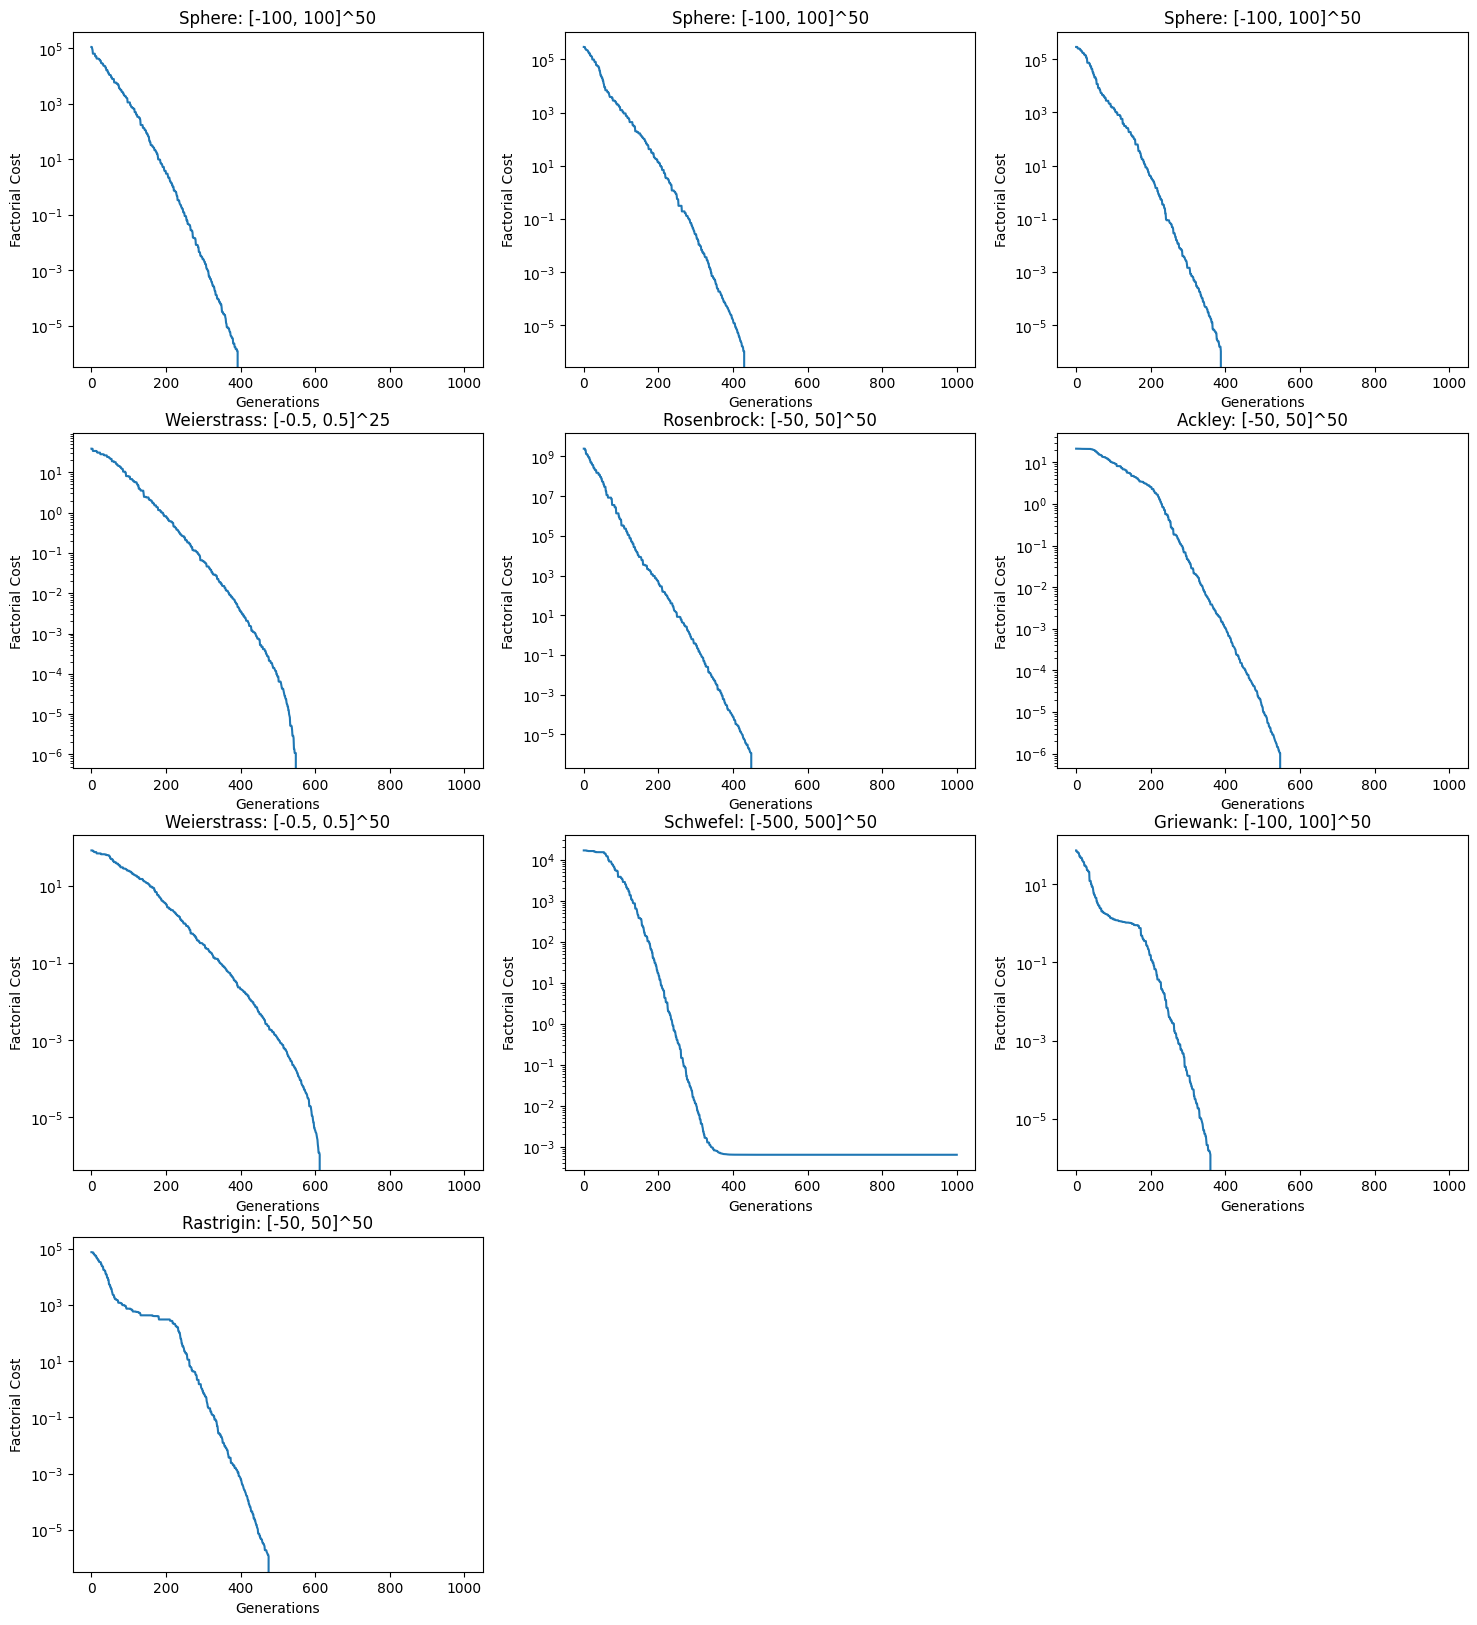

In [7]:
model_algorithms.render_history(yscale='log')

In [10]:
getattr(getattr(model_algorithms, 'selection'), 'random_percent')

0.1

In [12]:
model_algorithms.history_cost[-1]

array([1367.75772263,  718.74383021,  390.80083956,  994.20222441,
        465.86679174,  861.01112816,  287.68873353, 1003.95842154,
       1559.98703147, 1451.89588328, 1168.17676571,  870.86971321,
       1560.72862374,  885.55455705, 1505.08779626,  997.72204535,
        765.57127093, 1392.6557554 , 1099.25761405,  784.62994311,
        781.10182173, 1418.66355743,  797.12583224, 1024.96799006,
       1432.17346913,  230.29383228,  961.36444884, 1403.87729039,
       1002.37317991, 1550.96788665,  937.38225938,  770.86642739,
        211.6756544 , 1598.26122752,  990.52941905,  409.17116959,
        591.84404446,  750.76216135, 1863.93599456, 1119.95782423,
        295.26219394, 1373.01466815,  677.19319838, 1149.71047367,
        738.92037862, 1095.81691257,  714.23843991, 1419.57464048,
       1137.5242927 ,  611.29849145])

In [11]:
getattr(model_algorithms, "")

20

In [21]:
pd.DataFrame.to_csv(pd.DataFrame(model_algorithms.history_cost[-1]), 'result.csv')

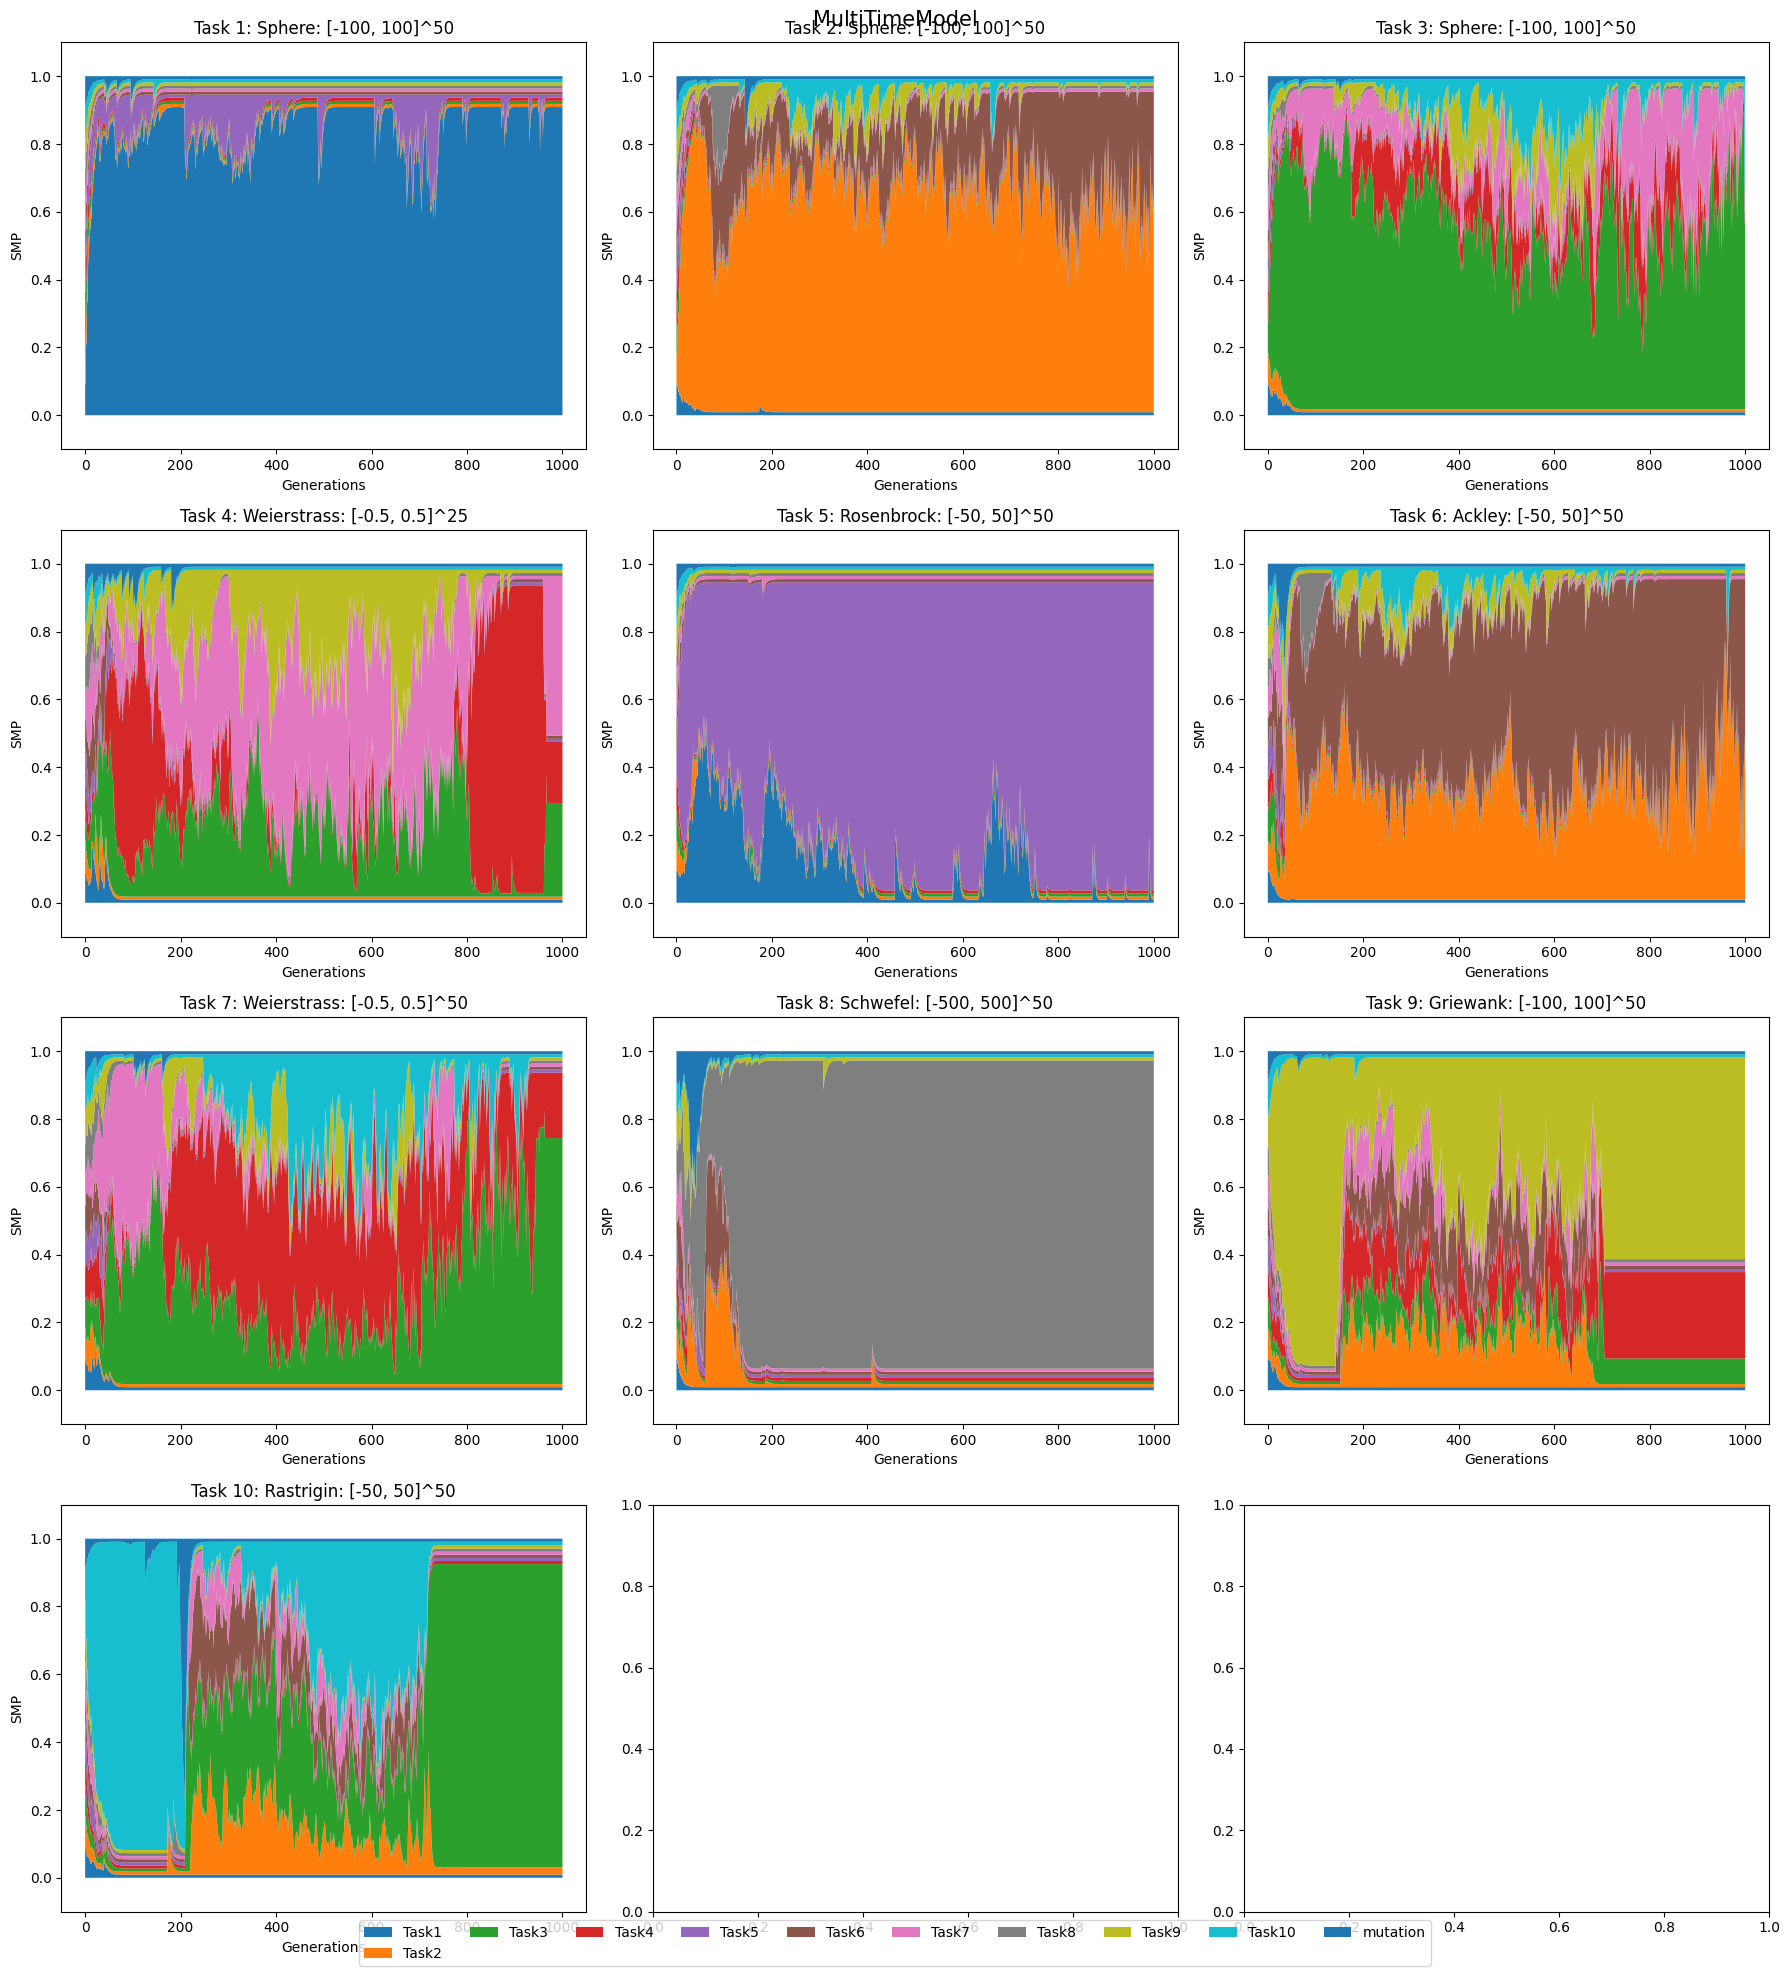

In [3]:
model_algorithms.render_smp()

In [4]:
model = loadModelFromTxt(
    source_path= "./RESULTS/MTOSOO_P1.txt",  
    model_algorithm= SM_MFEA, 
    multitime_model_class= MultiTimeModel, 
    target_path= "./RESULTS/", 
    remove_tasks= True, 
    history_cost_shape= (1000, 2), 
    nb_runs= 1,
    ls_tasks= WCCI22_benchmark.get_complex_benchmark(1)[0],

)

In [6]:
model.history_cost[-1]

array([605.513152, 610.187823])

In [ ]:
a = np.random.rand(100, 100)

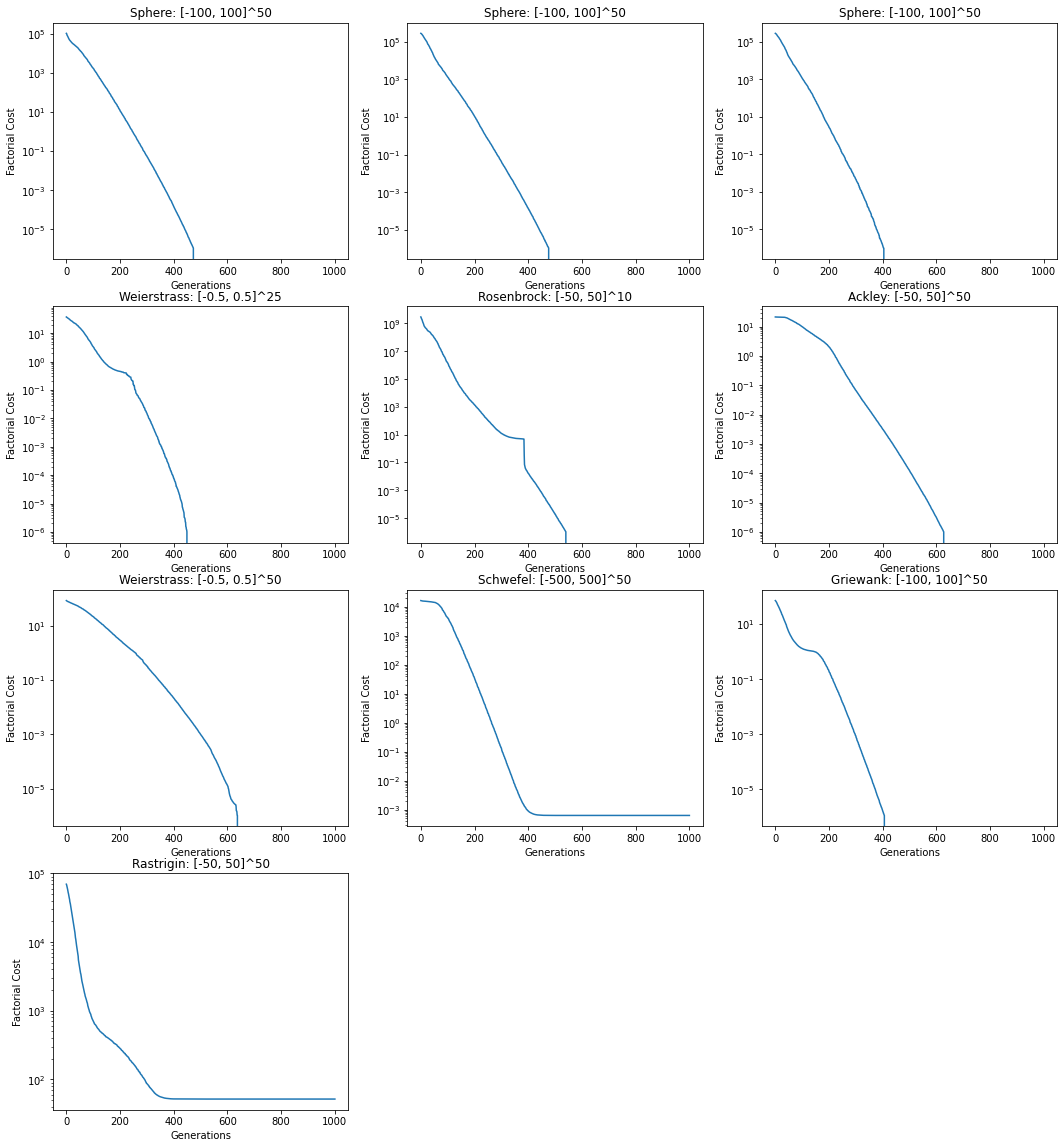

In [ ]:
model_algorithms.render_history(yscale='log')

## Convert

In [2]:
import pickle 
import os 

def export2txt(source_file, 
               save_file, 
               total_evals = int(100000 * 2), 
                steps = 1000, ):
        model = pickle.load(open(source_file, 'rb'))
        tmp = np.concatenate([model['ls_model'][i]['history_cost'] for i in range(len(model['ls_model']))], axis=1)
        stt = np.arange(total_evals // steps, total_evals + total_evals // steps, total_evals // steps)
        # stt = stt.reshape(1,int((200000)/ 2000))
        stt = stt.reshape(1, -1) 
        tmp = tmp.T
        if tmp.shape[1] > stt.shape[1]:
            tmp = tmp[:, -stt.shape[1]:]
        else: 
            print(tmp.shape)
            print(tmp[0:2, 0])
            tmp = np.concatenate([np.repeat(tmp[:, 0:1], stt.shape[1] - tmp.shape[1], axis=1), tmp], axis=1)
            print(tmp.shape)
            print(tmp[0:2, 1])
        assert tmp.shape[1] == stt.shape[1], print(tmp.shape)
        tmp4= np.concatenate([stt, tmp], axis=0).T

        f = open(save_file, "w")
        for line in tmp4: 
            f.write(", ".join([str(int(line[0]))] + [str('{:.30f}'.format(e)) for e in line[1:]]) + "\n")
        f.close()

def export_all2txt(source_folder, destination_folder): 
    for item in os.listdir(source_folder): 
        current_source_path= os.path.join(source_folder, item)
        if os.path.isdir(current_source_path):
            export_all2txt(current_source_path, os.path.join(destination_folder, item))
        else: 
            current_save_path = os.path.join(destination_folder, item)[:-4] + ".txt"
            if os.path.isdir(destination_folder) is False: 
                os.makedirs(destination_folder) 
            print(current_source_path)
            # file = pickle.load(open(current_source_path, 'rb'))
            export2txt(
                 source_file= current_source_path, 
                 save_file= current_save_path, 
                 total_evals= int(1e5 * 10), 
                 steps= 1000, 
            )

def export_all2mso(source_folder, destination_folder): 
    for item in os.listdir(source_folder): 
        current_source_path= os.path.join(source_folder, item)
        if os.path.isdir(current_source_path):
            export_all2mso(current_source_path, os.path.join(destination_folder, item))
        else: 
            current_save_path = os.path.join(destination_folder, item)[:-4] + ".mso"
            if os.path.isdir(destination_folder) is False: 
                os.makedirs(destination_folder) 
            # print(current_source_path)
            # file = pickle.load(open(current_source_path, 'rb'))
            model = loadModelFromTxt(
                source_path= current_source_path, 
                model_algorithm= AbstractModel, 
                multitime_model_class= MultiTimeModel, 
                target_path= "./", 
                history_cost_shape= (1000, 10), 
                nb_runs= 30, 
                # ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0] 
                ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]
            )
            saveModel(
                model= model, 
                PATH= current_save_path, 
                remove_tasks= True, 
            )


In [7]:
import os 
len(os.listdir("Data/EBSGA_wo_DaS"))

10

In [3]:
export_all2txt(source_folder= "compare_KL_SBX_old", 
               destination_folder= "compare_KL_SBX_old_txt")

compare_KL_SBX_old/COMPARE_KL_SBX_S-MFEA/KL/S-MFEA_KL_CEC17_PYTHON.mso
compare_KL_SBX_old/COMPARE_KL_SBX_S-MFEA/SBX/S-MFEA_CEC17_PYTHON.mso
compare_KL_SBX_old/COMPARE_KL_SBX_MFEA/KL/MFEA_1.mso
compare_KL_SBX_old/COMPARE_KL_SBX_MFEA/SBX/MFEA_cec17_1.mso
compare_KL_SBX_old/COMPARE_KL_SBX_LSA/KL/LSA_KL_CEC17_PYTHON_1.mso
(300, 1000)
[111263.03503853 296414.10690854]
(300, 1000)
[106512.94165344 276044.57720056]
compare_KL_SBX_old/COMPARE_KL_SBX_LSA/SBX/LSA_SBX_CEC17_JAVA_1.mso
(300, 998)
[103786.65127899 300322.35936713]
(300, 1000)
[103786.65127899 300322.35936713]


In [4]:
export_all2mso(
    source_folder= "compare_KL_SBX_old_txt", 
    destination_folder= "compare_KL_SBX"
)

In [48]:
st = "5000, 3233685177.335206, 21.254207, 30267.617163, 26.511870, 76.005243, 15780.898998, 3110869825.840165, 21.165202, 26081.012467, 30.428965, 75.654435, 14913.499115, 3046715276.973135, 21.254558, 29224.821214, 28.466695, 74.382823, 14802.592113, 3262145695.956045, 21.259172, 23831.717600, 29.584425, 76.241141, 15347.361935, 4340220049.324294, 21.280659, 29928.793770, 26.235681, 75.241008, 15118.476184, 4158466463.022346, 21.233533, 27893.570405, 26.138809, 75.879354, 14322.598094, 2378507682.951922, 21.238021, 27246.709104, 27.882461, 72.663462, 14342.353182, 4212939679.652127, 21.277576, 27122.228520, 29.275239, 76.307919, 14371.998614, 4332334679.225216, 21.223583, 3268646653.200590, 21.195695, 27674.272702, 25.437706, 73.571507, 13469.551173, 4040358906.100990, 21.251511, 31310.072726, 30.314340, 65.028095, 14986.232564, 3699659902.655124, 21.234564, 32198.075383, 27.688393, 75.673866, 15185.783739, 3033690138.880203, 21.257353, 24922.776580, 27.791548, 76.544145, 14690.262584, 4117356523.163053, 21.309514, 26707.409261, 27.945564, 76.236798, 14739.845060, 3230594755.800063, 21.298127, 28271.291138, 27.001225, 74.450342, 15067.792429, 3969441308.318172, 21.270080, 28579.819208, 31.807554, 74.530729, 15142.062867, 4496594443.551032, 21.253212, 28032.460045, 27.068178, 75.810248, 15267.046647, 3559647632.182570, 21.212607, 4181763964.417141, 21.315878, 30523.320390, 29.064835, 76.823412, 14978.838458, 4524942956.922293, 21.294569, 25189.534179, 32.344673, 76.370940, 15016.447398, 4705617086.061606, 21.299601, 28107.406418, 24.781467, 75.279210, 15014.988413, 2866894090.795000, 21.274821, 30391.863926, 27.309125, 75.606544, 15622.435698, 3481665803.353276, 21.280866, 28215.129415, 25.220760, 76.799076, 15478.295840, 3944496802.445446, 21.244494, 32213.199875, 30.367754, 76.144408, 15200.955599, 4668558645.848586, 21.158126, 26819.767613, 31.559333, 74.913197, 14704.559261, 4234111940.808698, 21.298140, 29489.639607, 30.082810, 73.807044, 14092.832727, 4281121764.588696, 21.208959, 4199853126.738291, 21.268223, 25991.943539, 25.997502, 70.796736, 14939.799148, 3284710947.335869, 21.233840, 28593.433427, 26.989395, 75.260469, 15333.768276, 3813286969.435486, 21.213758, 26184.350357, 30.712885, 74.069447, 15030.226155, 4048274770.083819, 21.234688, 29000.180849, 29.769509, 76.478196, 13099.573738, 3642536171.657684, 21.339292, 26237.272821, 28.564975, 73.938619, 13983.559107, 3704807749.631057, 21.205291, 22812.474828, 26.582216, 76.311473, 14582.488379, 3979163407.003137, 21.283926, 28748.693026, 28.216349, 67.403092, 14583.481724, 4049279535.810472, 21.267006, 29713.165167, 30.916258, 74.654209, 14929.377382, 4215231526.576835, 21.234569, 3232931827.623110, 21.316796, 29586.508697, 26.170053, 74.065506, 14812.638008, 3326829254.888105, 21.269219, 30483.792660, 29.898021, 72.156221, 14145.842835, 4921848028.388072, 21.228372, 32473.910547, 28.118704, 74.641360, 15042.228153, 3375357724.936391, 21.274729, 26143.694569, 27.897426, 75.471871, 14446.506430, 3644845939.576524, 21.270967, 29728.755176, 24.577693, 76.683746, 15422.460698, 3876395975.775329, 21.308671, 31293.004496, 24.252883, 74.180289, 15689.233472, 3233579075.820123, 21.272411, 28138.059758, 30.027245, 71.853908, 14208.038055, 4396138572.066072, 21.187344, 29605.068006, 29.427001, 75.518551, 14868.986706, 4008095370.876235, 21.148557"
print(len(st.split(",")))

251


In [7]:
model = loadModel("RESULTS/GECCO_mso/EME-BI/3.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])

In [8]:
print(model.history_cost[-1])

[ 97.39071773 101.36885133  77.8305716   73.02912203  90.11771267
  93.11477083  84.09763     81.53223    101.87906627  73.15881177
  81.3184241   91.0869599   74.41751193 105.3853295  119.4569932
  84.18691847  85.54085507  80.99721163  76.51477777  77.84764433
  78.292462    84.1259345   90.85656013  72.3026561   71.68353273
  91.41018407  71.6159987   69.50857207  63.04354183  71.1798443
  91.32376507  75.50503387  83.252781    92.3483157   91.52561437
  91.53450007  90.2771817   84.11137307  69.5873063   94.46997497
  88.19248507  86.8321335   70.5229349   80.2076014   96.84599203
  77.41904717  73.04972883  74.97833043  76.5653682   88.27234403]


In [25]:
file = pickle.load(open("Data/convergence_trend_das_dict/SBSGA_w_DaS.mso", 'rb'))
np.array(file['history_cost'])[-1][0]

EOFError: Ran out of input

In [26]:
file = pickle.load(open("/home/anhdt-minhdt/Data_dictmso/CEC17/Compare_conver_trend/S-MFEA_KL_CEC17_PYTHON.mso", 'rb'))
np.array(file['ls_model'][0]['history_cost'])[0]

array([8.89029678e+04, 2.96414107e+05, 2.87396204e+05, 3.86623201e+01,
       2.91565438e+09, 2.13677191e+01, 8.21515024e+01, 1.67931516e+04,
       7.41242427e+01, 7.52473002e+04])

In [2]:
tasks, _ = CEC17_benchmark.get_10tasks_benchmark() 

In [20]:

class Weierstrass(AbstractFunc):
    '''
    global optima = 0^d
    '''    
    def __init__(self, dim, shift: list = 0, rotation_matrix: np.ndarray = None, bound: tuple = None):
        # self.global_optimal = np.array([0] * dim)
        # super().__init__(dim, shift, rotation_matrix, bound)
        self.params = {}
        self.params['a'] = 0.5
        self.params['b'] = 3
        self.params['k_max'] = 21

    # @staticmethod
    # @jit(nopython = True)
    # def _func(x, dim, params: dict):
    #     '''
    #     Request: input x is encoded
    #     '''
    #     left = 0
    #     for i in range(dim):
    #         left += np.sum(params['a'] ** np.arange(params['k_max']) * \
    #             np.cos(2*np.pi * params['b'] ** np.arange(params['k_max']) * (x[i]  + 0.5)))
            
    #     right = dim * np.sum(params['a'] ** np.arange(params['k_max']) * \
    #         np.cos(2 * np.pi * params['b'] ** np.arange(params['k_max']) * 0.5)
    #     )
    #     return left - right

    # def __call__(self, x):
    #     x = self.__class__._convert(x)
    #     x = self.__class__.decode(x, self.dim, self.limited_space, self.bound, self.rotation_matrix, self.shift)
    #     return __class__._func(x,self.dim, self.params)


a = Weierstrass(     50,shift= 0,    bound= [-100, 100]),   # 0 

f = open("te.mso", 'wb')
pickle.dump(a, f)
f.close()

In [17]:
from numba import njit
from numba.typed import List

@njit
def foo(x):
    x.append(10)

a = [1, 2, 3]
typed_a = List()
[typed_a.append(x) for x in a]
foo(typed_a)

In [25]:
from numba import njit
from numba.typed import Dict, List 
import numba 

@njit
def foo(x, y):
    new_a = {}
    index = 0 
    for i in x:
        new_a[i]  = (y[index])
        index += 1  
    return new_a 

def ls_primary_to_ls_numba(ls, default_type= None):
    new_ls = List() 
    if default_type is None: 
        [new_ls.append(x) for x in ls]

    else:
        [new_ls.append(default_type(x)) for x in ls]
    
    return new_ls 

    

# a = [1, 2, 3]
a = {'a': 2.0, 'b': 0.3}
print(a.keys())
b = foo(ls_primary_to_ls_numba(a.keys()), ls_primary_to_ls_numba(a.values(), float))

dict_keys(['a', 'b'])


In [20]:
ae= ls_primary_to_ls_numba(a.keys())

In [22]:
print(ae)

None


In [26]:
print(b)

{a: 2.0, b: 0.3}


In [8]:
print(tasks[0])

In [12]:
import pickle 


f = open("te.mso", 'wb')
pickle.dump(tasks[3], f)
f.close()

TypeError: cannot pickle '_nrt_python._MemInfo' object

# Export excel

In [7]:
model = loadModel("RESULTS/result/GECCO20/SMP_v2/2.mso", ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(2)[0])

In [9]:
model.history_cost.shape

(201, 50)

In [12]:
print(os.listdir("RESULTS/SM_MFEA_DaS/WCCI22/S-MFEA_KL"))

['2.mso', '10.mso', '1.mso', '5.mso', '4.mso', '3.mso', '6.mso', '8.mso', '7.mso', '9.mso']


In [32]:
path = "RESULTS/result/GECCO20/check"
name = [str(i) + ".mso" for i in range(1, 11)]
history_cost_summaries = []
for model_lib in os.listdir(path): 
    print(model_lib)
    tmp = []
    # for id in os.listdir("RESULTS/SM_MFEA_DaS/WCCI22/SM_MFEA_DaS/"):
    for id in name:
        print("id: ", id)
        model = loadModel(os.path.join(os.path.join(path, model_lib), id), ls_tasks= WCCI22_benchmark.get_50tasks_benchmark(1)[0])
        tmp += np.array(model.history_cost[-1]).tolist() 
    print(len(tmp))
    history_cost_summaries.append(tmp.copy())
     

ls_col_name = os.listdir(path)
history_cost_summaries = np.array(history_cost_summaries)
history_cost_summaries = np.where(history_cost_summaries < 1e-6, 0, history_cost_summaries)
print(history_cost_summaries.T.shape)
df = pd.DataFrame(history_cost_summaries.T,columns= ls_col_name)
pd.DataFrame.to_csv(df, "history_cost_summaries.csv")

SMP_MFEA_SBX
id:  1.mso
id:  2.mso
id:  3.mso
id:  4.mso
id:  5.mso
id:  6.mso
id:  7.mso
id:  8.mso
id:  9.mso
id:  10.mso
500
(500, 1)


In [5]:
import pickle 

a = pickle.load(open("./Data/EBSGA_wo_DaS/1.mso", 'rb'))

# Compare

In [2]:
compare= CompareModel(
    models = [
        # loadModel("./Data/convergence_trend_das/MaTGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/MaTGA_wo_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/SBSGA_wo_DaSCEC17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/SBSGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/MFEA_KL_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/MFEA_SBX_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/LSA_SBX_CEC17_JAVA_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        # loadModel("./Data/convergence_trend_das/LSA_KL_CEC17_PYTHON_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

    ],
    # label= ["MaTGA-DaS", 'MaTGA', 'SBSGA', 'SBSGA-DaS', 'SM-MFEA-DaS', 'SM-MFEA', 'MFEA_DaS', 'MFEA', "LSA", "LSA-DaS"] 
    # label= ['SBSGA', 'SBSGA-DaS'] 
)

compare.render(
    shape=(2,5), 
    min_cost= 1e-6, 
    step=100, 
    yscale='log',
    title="",
    grid= True,
    showname= False,
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    scatter_size=10,
)

3


IndexError: list index out of range

3


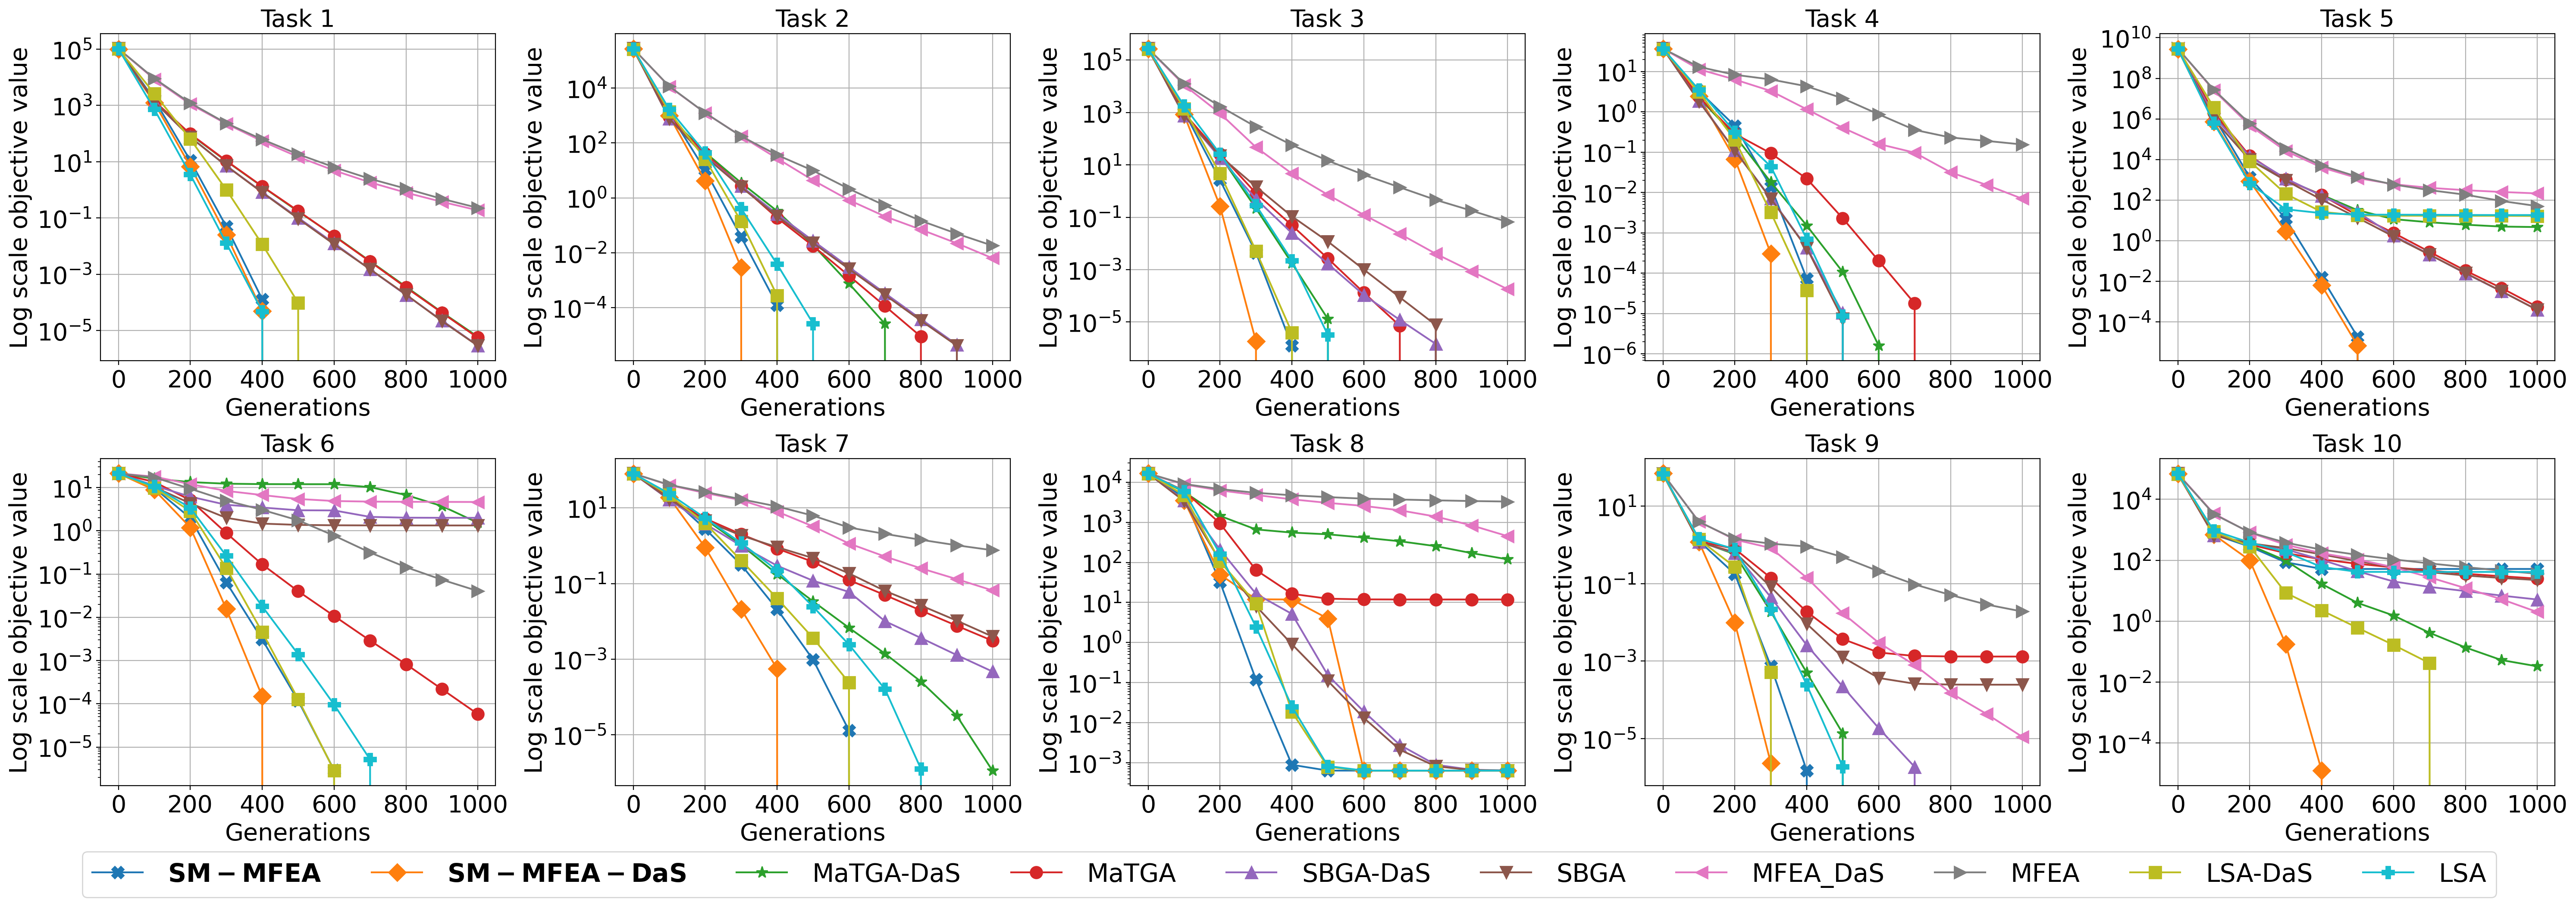

In [3]:
'''Compare between S-MFEA with other MODEL'''

compare= CompareModel(
    models = [
        loadModel("./Data/convergence_trend_das/S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/MaTGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/MaTGA_wo_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/SBSGA_w_DaS.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/SBSGA_wo_DaSCEC17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/MFEA_KL_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/MFEA_SBX_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/LSA_KL_CEC17_PYTHON_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
        loadModel("./Data/convergence_trend_das/LSA_SBX_CEC17_JAVA_1.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

    ],
    label= [ '$\\bf{SM-MFEA}$', '$\\bf{SM-MFEA-DaS}$', "MaTGA-DaS", 'MaTGA', 'SBGA-DaS', 'SBGA', 'MFEA_DaS', 'MFEA', "LSA-DaS", "LSA",] 
)
compare.render(
    shape=(2,5), 
    min_cost= 1e-6, 
    step=100, 
    yscale='log',
    title="",
    grid= True,
    showname= False,
    title_size= 20,
    label_size_x= 20,
    label_size_y= 20,
    x_tick_size= 20,
    y_tick_size= 20,
    handletextpad= 1,
    # borderaxespad=0.8,
    bbox_to_anchor=(0.5,-0.06),
    legend_size= 21,
    scatter_size=10,
)



In [12]:
models = [
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//S-MFEA_KL_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//S-MFEA_CEC17_PYTHON.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//LSA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//EBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//SBS_GA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//MaTGA_CEC17_JAVA.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//MTEA_AD_CEC17_matlab.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),
    loadModel("/home/anhdt-minhdt/Data/CEC17/Compare_conver_trend//MFEA_cec17.mso",ls_tasks= CEC17_benchmark.get_10tasks_benchmark()[0]),

],

In [13]:
models

([<pyMSOO.utils.LoadSaveModel.load_utils.MultiTimeModel at 0x7f88882512e0>,
  <pyMSOO.utils.LoadSaveModel.load_utils.MultiTimeModel at 0x7f87148c8d00>],)

In [15]:
for model in models[0]:
    print(model.history_cost.shape)

(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)
(1000, 10)


In [11]:
model[0].history_cost.shape

(1000, 10)

In [18]:
pcd_pa = np.random.rand(10, 50)
pcd_pa = np.array([[0.1, 0.9, 0.3], [0.9, 0.1, 0.5], [0.2, 0.5, 0.2]])

In [19]:
pcd_pa_pb = pcd_pa[2] 

mse_loss = np.mean(np.sqrt((pcd_pa - pcd_pa_pb) ** 2), axis= 1)

In [20]:
mse_loss

array([0.2       , 0.46666667, 0.        ])

In [27]:
idx_trans_ab = np.array([1,0,0,1])
idx_trans_ac = np.array([0,0,1,1])

priority = np.array([0, 1, 1, 0])

idx_trans_ab = np.where(idx_trans_ab == idx_trans_ac, priority * idx_trans_ab, idx_trans_ab)
idx_trans_ac = np.where(idx_trans_ab == idx_trans_ac, (1 - priority) * idx_trans_ac, idx_trans_ac)

In [28]:
print(idx_trans_ab)
print(idx_trans_ac)

[1 0 0 0]
[0 0 1 1]
